# # Background: 
In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component of American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America from 1998 to 2016.

# Objective: 
To visualise how honey production is changed over the years (1998-2016) in the United States. 

# Key questions to be answered:

* How has honey production yield changed from 1998 to 2016?
* Over time, what are the major production trends been across the states?
* Are there any patterns that can be observed between total honey production and value of production every year? How has value of production, which in some sense could be tied to demand, changed every year?

# Dataset:

* state: Various states of U.S.
* numcol: Number of honey-producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies that did not survive the entire year
* yieldpercol: Honey yield per colony. Unit is pounds
* totalprod: Total production (numcol x yieldpercol). Unit is pounds
* stocks: Refers to stocks held by producers. Unit is pounds
* priceperlb: Refers to average price per pound based on expanded sales. The unit is dollars.
* prodvalue: Value of production (totalprod x priceperlb). The unit is dollars.
* year: Year of production

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

In [4]:
honeyprod = pd.read_csv('honeyproduction1998-2016 (2).csv')

In [5]:
honeyprod.head(10)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.00000,71,1136000.00000,159000.00000,0.72000,818000.00000,1998
1,Arizona,55000.00000,60,3300000.00000,1485000.00000,0.64000,2112000.00000,1998
2,Arkansas,53000.00000,65,3445000.00000,1688000.00000,0.59000,2033000.00000,1998
3,California,450000.00000,83,37350000.00000,12326000.00000,0.62000,23157000.00000,1998
4,Colorado,27000.00000,72,1944000.00000,1594000.00000,0.70000,1361000.00000,1998
5,Florida,230000.00000,98,22540000.00000,4508000.00000,0.64000,14426000.00000,1998
6,Georgia,75000.00000,56,4200000.00000,307000.00000,0.69000,2898000.00000,1998
7,Hawaii,8000.00000,118,944000.00000,66000.00000,0.77000,727000.00000,1998
8,Idaho,120000.00000,50,6000000.00000,2220000.00000,0.65000,3900000.00000,1998
9,Illinois,9000.00000,71,639000.00000,204000.00000,1.19000,760000.00000,1998


In [6]:
honeyprod.year = honeyprod.year.astype('category') # To convert year into categories
honeyprod.year

0      1998
1      1998
2      1998
3      1998
4      1998
       ... 
780    2016
781    2016
782    2016
783    2016
784    2016
Name: year, Length: 785, dtype: category
Categories (19, int64): [1998, 1999, 2000, 2001, ..., 2013, 2014, 2015, 2016]

In [7]:
honeyprod.year = honeyprod.year.astype('category') # To convert year into categories
honeyprod.astype

<bound method NDFrame.astype of              state       numcol  yieldpercol      totalprod         stocks  \
0          Alabama  16000.00000           71  1136000.00000   159000.00000   
1          Arizona  55000.00000           60  3300000.00000  1485000.00000   
2         Arkansas  53000.00000           65  3445000.00000  1688000.00000   
3       California 450000.00000           83 37350000.00000 12326000.00000   
4         Colorado  27000.00000           72  1944000.00000  1594000.00000   
..             ...          ...          ...            ...            ...   
780       Virginia   5000.00000           38   190000.00000    30000.00000   
781     Washington  84000.00000           35  2940000.00000   412000.00000   
782  West Virginia   5000.00000           32   160000.00000    43000.00000   
783      Wisconsin  54000.00000           62  3348000.00000  1205000.00000   
784        Wyoming  40000.00000           68  2720000.00000   190000.00000   

     priceperlb      prodvalue 

In [8]:
honeyprod.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
count,785.00000,785.00000,785.00000,785.00000,785.00000,785.00000
mean,61686.62420,60.57834,4140956.68790,1257629.29936,1.69516,5489738.85350
std,92748.94046,19.42783,6884593.85877,2211793.81706,0.93062,9425393.87822
min,2000.00000,19.00000,84000.00000,8000.00000,0.49000,162000.00000
25%,9000.00000,46.00000,470000.00000,119000.00000,1.05000,901000.00000
50%,26000.00000,58.00000,1500000.00000,391000.00000,1.48000,2112000.00000
75%,65000.00000,72.00000,4096000.00000,1380000.00000,2.04000,5559000.00000
max,510000.00000,136.00000,46410000.00000,13800000.00000,7.09000,83859000.00000


Observations:
1. Number of colonies in every state are spread over a huge range. Ranging from 2000 to 510000.
2. The mean numcol is close to the 75% percentile of the data, indicating a right skew.
3. As expected, standard deviation of numcol is very high
4. yieldpercol - Yield per colony also has huge spread ranging from 19 pounds to 136 pounds.
5. Infact, all the variable seem to have a huge range, we will have to investigate furthur if this spread is mainly across different states or varies in the same state over the years. 

#### Looking at the relationship between numerical variables using pair plots and correlation plots

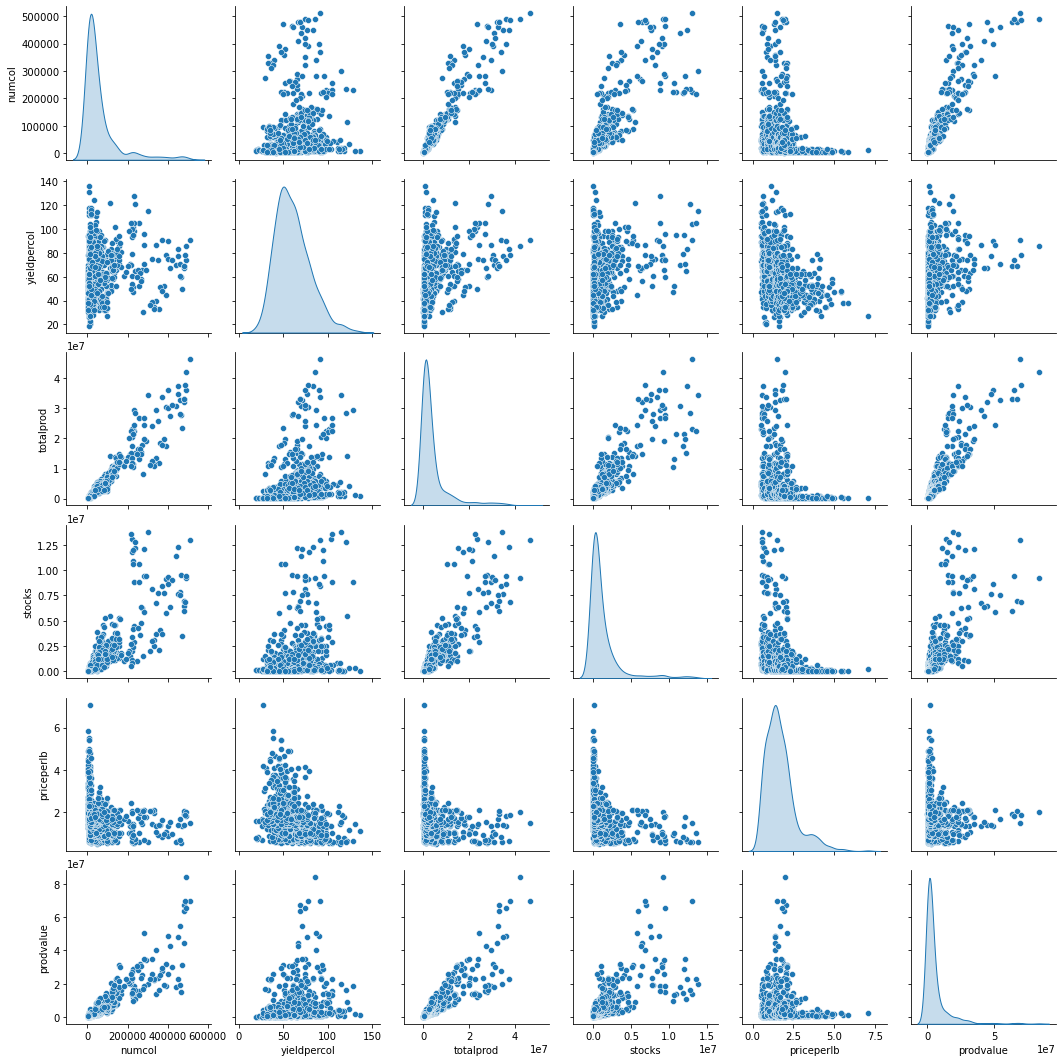

In [9]:
sns.pairplot(honeyprod, diag_kind="kde")

In [10]:
correlation = honeyprod.corr() # creating a 2-D Matrix with correlation plots
correlation

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.00000,0.22454,0.95182,0.82008,-0.21143,0.89899
yieldpercol,0.22454,1.00000,0.38295,0.35868,-0.36057,0.25579
totalprod,0.95182,0.38295,1.00000,0.87687,-0.23909,0.89524
stocks,0.82008,0.35868,0.87687,1.00000,-0.27593,0.71316
priceperlb,-0.21143,-0.36057,-0.23909,-0.27593,1.00000,-0.06183
prodvalue,0.89899,0.25579,0.89524,0.71316,-0.06183,1.00000


In [11]:
sns.heatmap

<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

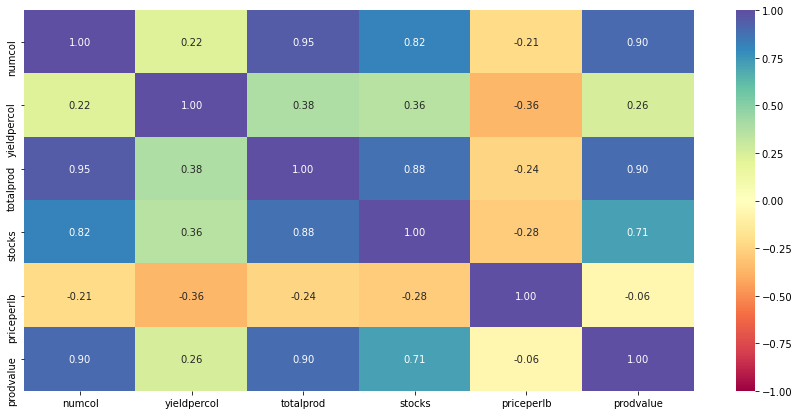

In [13]:
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:
1. Number of colonies have a high positive correlation with total production, stocks and the value of production. As expected, all these values are highly correlated with each other.
2. Yield per colony does not have a high correlation with any of the features that we have in our dataset. 
3. Same is the case with priceperlb.
4. Determining the factors influencing per colony yield and price per pound of honey would need furthur investigation.

### Let us now explore the categorical features - state and year

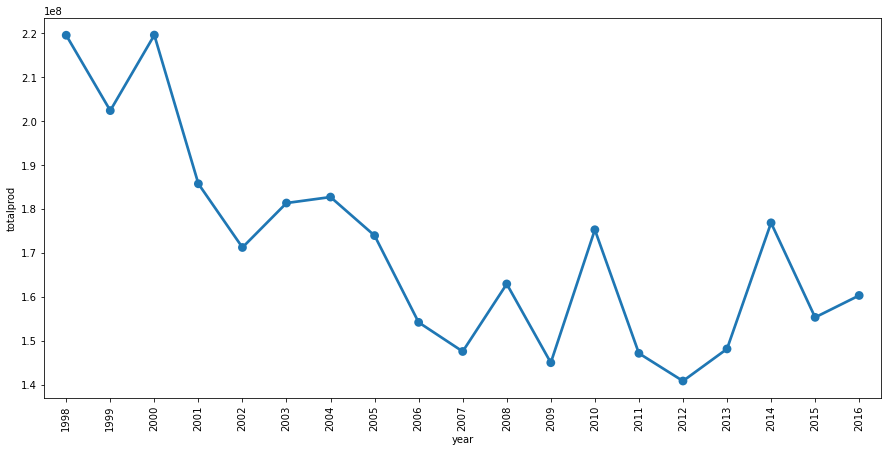

In [15]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='totalprod', data=honeyprod, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

In [16]:
honeyprod.groupby(['year'])['totalprod'].sum().reset_index()

,year,totalprod
0,1998,219519000.00000
1,1999,202387000.00000
2,2000,219558000.00000
3,2001,185748000.00000
4,2002,171265000.00000
5,2003,181372000.00000
6,2004,182729000.00000
7,2005,173969000.00000
8,2006,154238000.00000
9,2007,147621000.00000


Observations: 
1. The overall honey production in the US has been decresing over the years.
2. Total honey production = number of colonies * average yield per colony. Let us check if the honey production is decreasing due to one of these factors or both.

### Variation in the number of colonies over the years

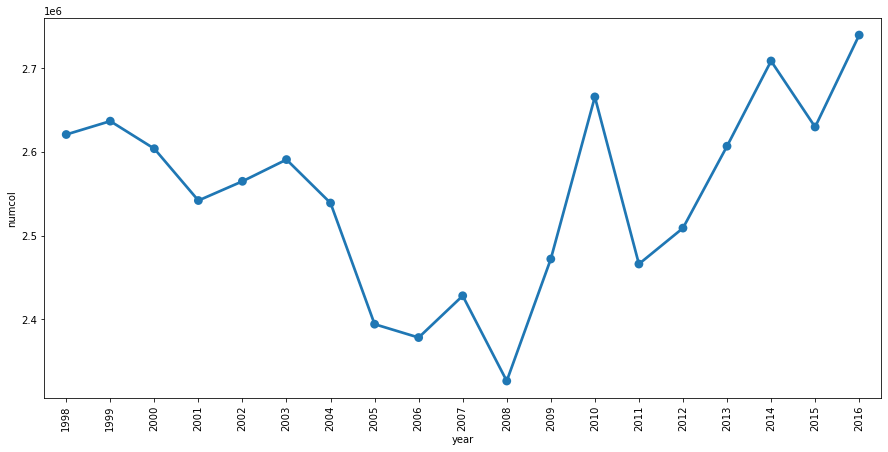

In [17]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='numcol', data=honeyprod, ci=None, estimator=sum)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Observations: 
1. The number of colonies across the country shows a declining trend from 1998-2008 but has seen an uptick since 2008.
2. It is possible that there was some intervension in 2008 that help in increasing the number of honey bee colonies across the country.

### Variation of yield per colony over the years

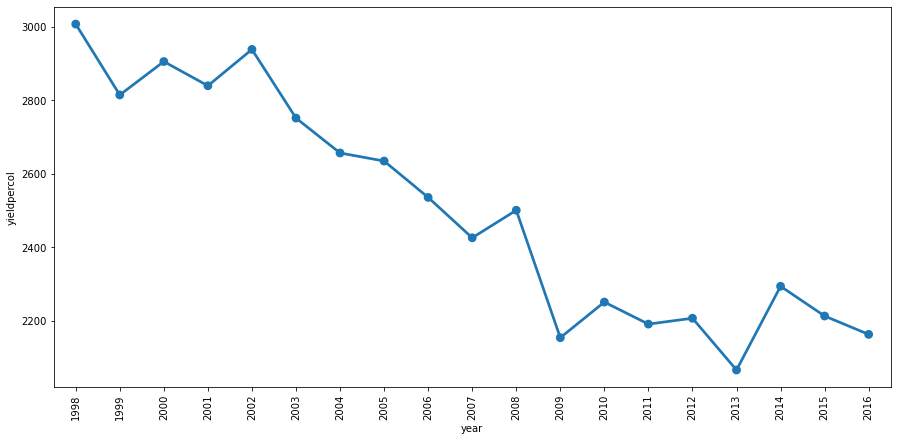

In [18]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='yieldpercol', data=honeyprod, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Observation: 
1. In contrast to number of colonies, the yield per colony has been decreasing since 1998.
2. This indicates that, it is not the number of colonies that is causing a decline in totalhoney production but the yield per colony.

### Let us look at the production trend at state level

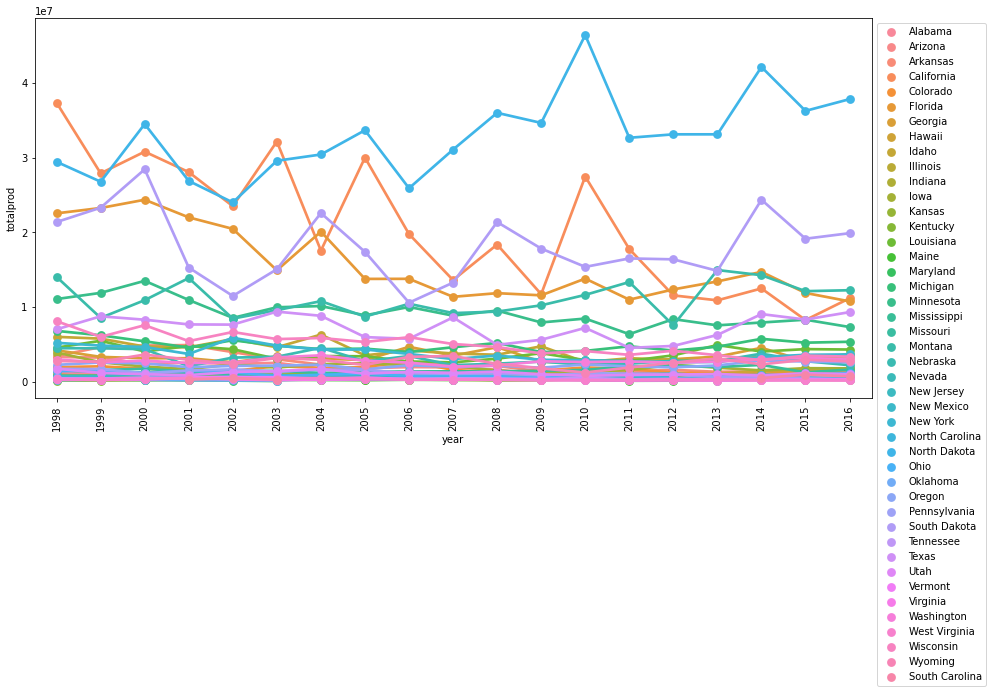

In [19]:
plt.figure(figsize=(15, 7)) # To resize the plot
sns.pointplot(x='year', y='totalprod', data=honeyprod, estimator=sum, ci=None, hue = 'state')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Observations: There are some states that have much higher productions than the others but this plot is a little hard to read. Let us try plotting each state seperatly for a better understanding. 

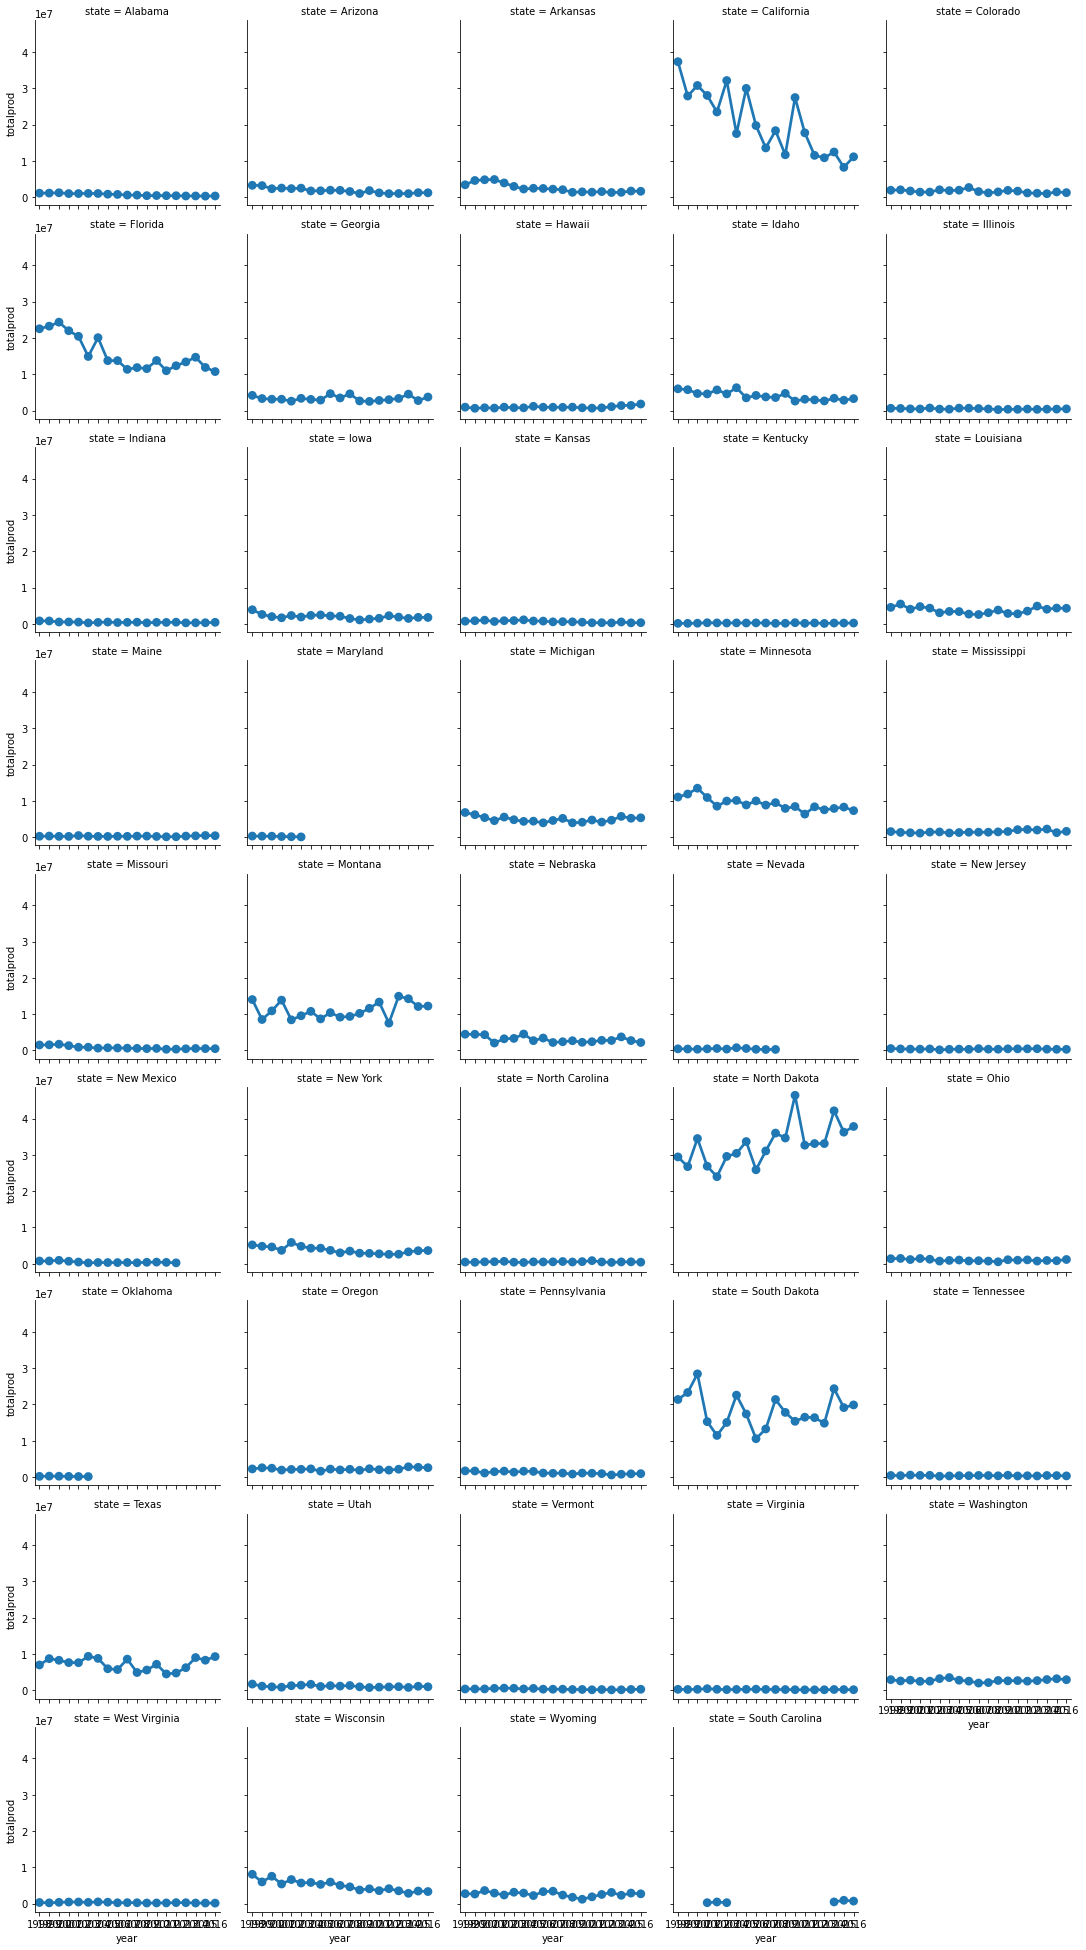

In [20]:
sns.catplot(x='year', y='totalprod', data=honeyprod,
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 5)
plt.show()

Observations: 
1. The most prominent honey producing states of US are - California, Florida, North Dakota and South Dakota and Montana
2. Unfortunately, the honey production in California has seen a steep decline over the years.
3. Florida's total production also has been on a decline. 
4. South Dakota has more of less maintained its levels of production.
5. North Dakota has actually seen an impressive increase in the honey production.

In [21]:
honeyprod.groupby(['state'])['totalprod'].mean().sort_values(ascending = False).reset_index().head()

,state,totalprod
0,North Dakota,32865000.00000
1,California,20542894.73684
2,South Dakota,18124263.15789
3,Florida,15673578.94737
4,Montana,11059210.52632


### Let us look at the yearly trend in number of colonies and yield per colony in these 5 states 

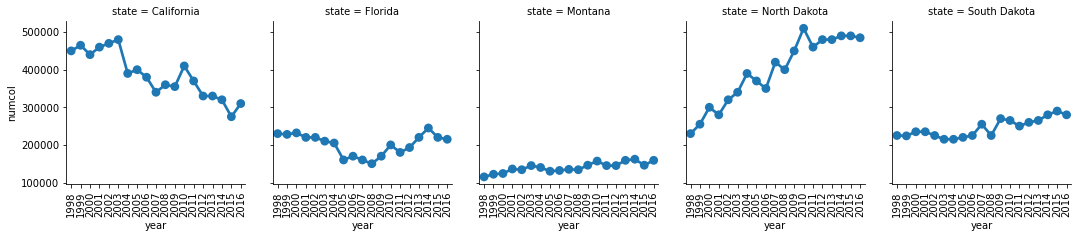

In [22]:
cplot1=sns.catplot(x='year', y='numcol', 
            data=honeyprod[honeyprod["state"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 5)
cplot1.set_xticklabels(rotation=90)
plt.show()

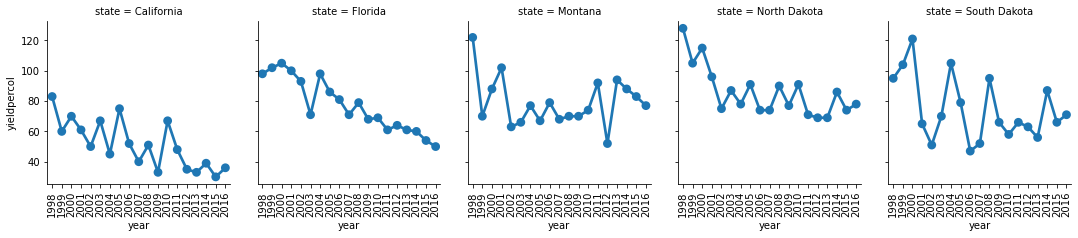

In [23]:
cplot2=sns.catplot(x='year', y='yieldpercol', 
            data=honeyprod[honeyprod["state"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 5)
cplot2.set_xticklabels(rotation=90)
plt.show()

Observation:
1. In North Dakota, the number of colonies has increased significantly over the years as compared to the other 4 states
2. If we check the yield per colony, it has been in an overall decreasing trend for all the 5 states over the years

### Let us see what effect, the declining production trend has had on the value of production 

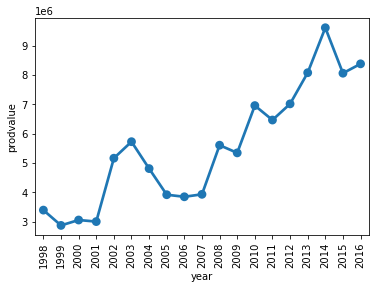

In [24]:
sns.pointplot(x="year", y="prodvalue", data=honeyprod, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Observations: 
1. This is an interesting trend. As the total production has declined over the years, the value of production per pound has increased over time.
2. As the supply declined, the demand has added to the value of honey.

### Let us check which of the states have been capitalising on this trend. We can compare the total production with the stocks held by the producers.

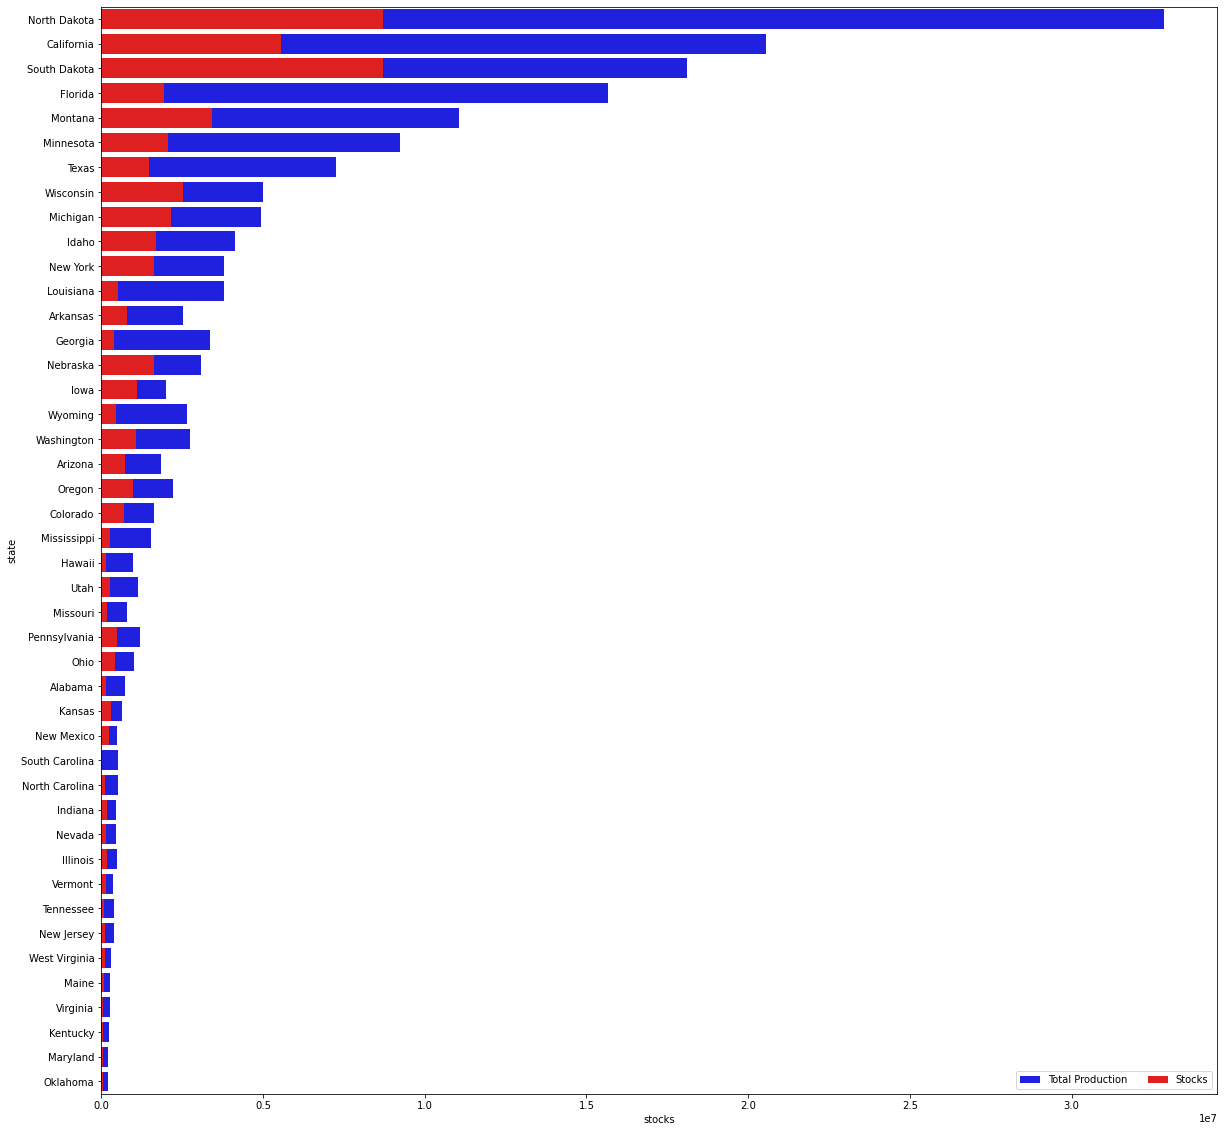

In [25]:
plt.figure(figsize = (20,20)) # To resize the plot

# Plot total production per state
sns.barplot(x="totalprod", y="state", data=honeyprod.sort_values("totalprod", ascending=False),
            label="Total Production", color="b", ci=None)

# Plot stocks per state
sns.barplot(x="stocks", y="state", data=honeyprod.sort_values("totalprod", ascending=False),
            label="Stocks", color="r", ci=None)

# Add a legend
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.show()

### Let us look at the average price per pound of honey across states

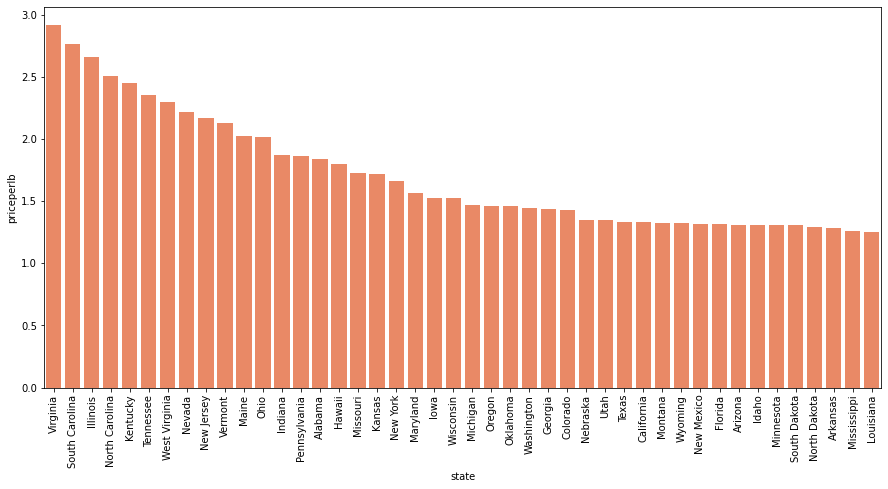

In [26]:
plt.figure(figsize=(15, 7)) # To resize the plot
sns.barplot(data = honeyprod, x = "state", y = "priceperlb", ci=None, color = "coral",
            order=honeyprod.groupby('state').priceperlb.mean().sort_values(ascending = False).index)
plt.xticks(rotation=90) # To rotate the x axis lables
plt.show()

Observations:
1. Virginia has the highest price per pound of honey.
2. The average price per pound of honey in the major honey producing states is towards the lower end. 

### Conclusion

* We can conclude that the total honey production has declined over the years whereas the value of production per pound has increased. 
* The reason for the declined honey production is the decrease in the yield per colony over the years.
* The major honey producing states are California, Florida, North Dakota, South Dakota and Montana. 
* Among these, Florida has been very efficient in selling honey.

### Let us look at the spread of average price of a pound of honey

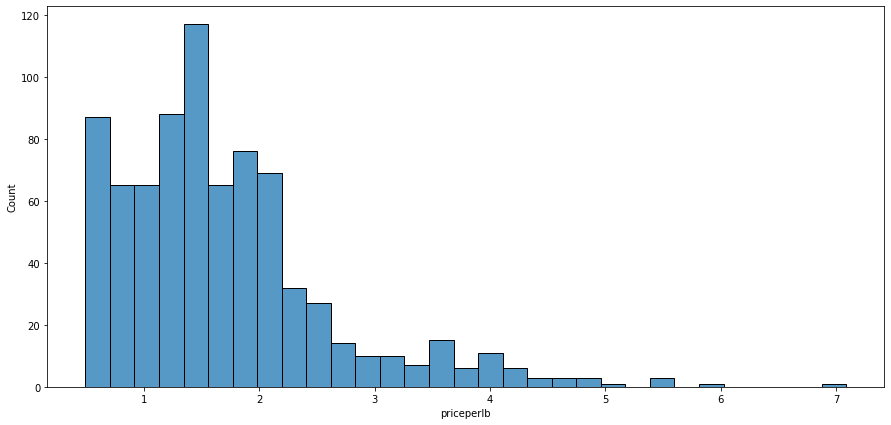

In [27]:
plt.figure(figsize=(15, 7))
sns.histplot(honeyprod.priceperlb)
plt.show()
